<a name = "inicio"></a>
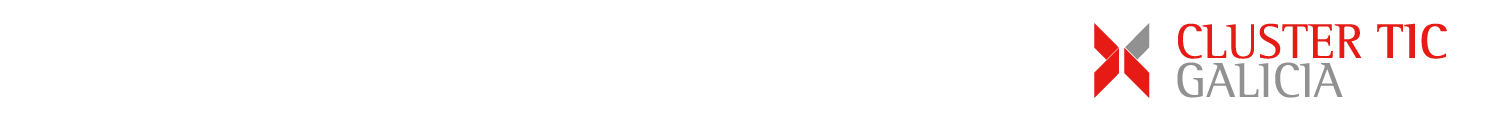

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Figuras y ejes</div>

1. [Creación de figuras](#Creación-de-figuras)
1. [Personalización de figuras](#Personalización-de-figuras)
1. [Creación de ejes](#Creación-de-ejes)
1. [Personalización de ejes](#Personalización-de-ejes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
generator = np.random.Generator(np.random.PCG64(seed = 0))

Ya se ha comentado que la figura es el contenedor dentro del cual vamos a crear una o más gráficas, cada una de ellas representada o accesible vía un conjunto de ejes. Recordemos los métodos principales para la creación de una figura y veamos posteriormente cómo podemos personalizarla.

# Creación de figuras

Además de la opción de usar una función como *plt.plot()* que genera una figura y un conjunto de ejes de forma implícita (aunque no nos permite su personalización), hemos visto ya los dos métodos principales para la creación de una figura. El primero es el uso de la función [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) que crea una nueva figura y devuelve una referencia a la misma:

In [3]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

La segunda forma vista consiste en el uso de la función [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) que genera una figura y uno o más conjuntos de ejes (uno por defecto), devolviendo una referencia a la figura y a los conjuntos de ejes en cuestión:

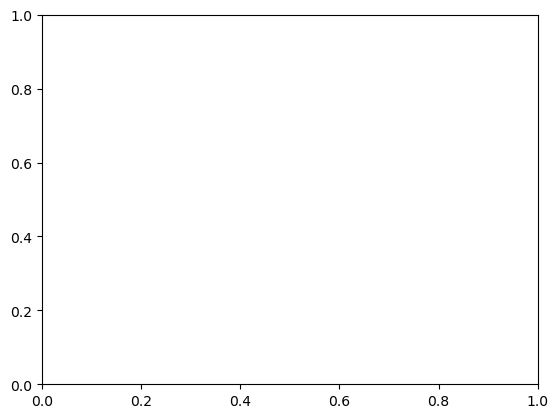

In [4]:
fig, ax = plt.subplots()

En ambos casos, el resultado contenido en la variable *fig* es una referencia a un objeto de tipo [matplotlib.figure.Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure), "contenedor" que engloba al resto de elementos involucrados en el dibujo de una gráfica.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Personalización de figuras

Usando el primer método (la función *plt.figure()*), es posible pasar como argumentos de la función valores que definan ciertas propiedades visuales de la figura. Generemos, en primer lugar, una figura sin personalizar (y añadamos en ella una sencilla gráfica):

In [5]:
y = generator.standard_normal(100).cumsum()

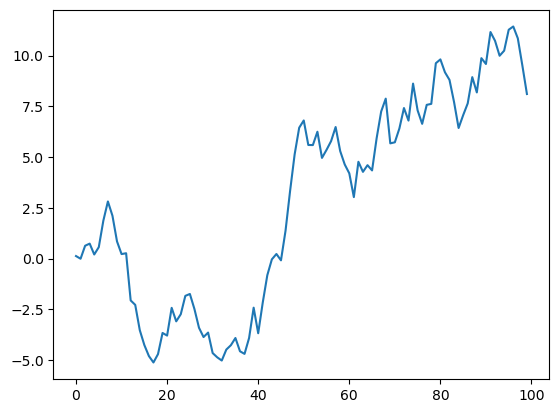

In [6]:
fig = plt.figure()
plt.plot(y)
plt.show()

Veamos -utilizando el mismo conjunto de valores para el eje vertical $y$- algunoa parámetros y métodos que podemos usar para su personalización.

### Tamaño y color de fondo

#### figsize

El primero de los parámetros que vamos a ver es **figsize**, que nos permite especificar el tamaño de la figura en pulgadas, indicando en primer lugar el ancho y, a continuación, el alto. Estos valores pueden pasarse como una lista o como una tupla:

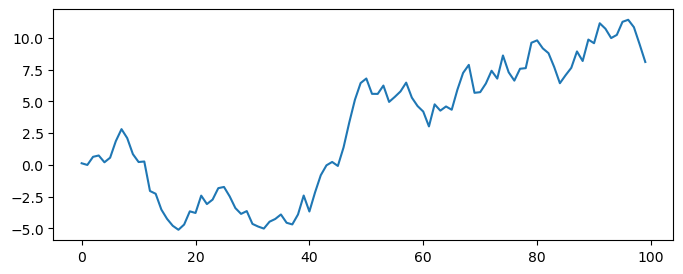

In [7]:
fig = plt.figure(figsize = (8, 3))
plt.plot(y)
plt.show()

El valor por defecto es (6.4, 4.8).

#### facecolor

El parámetro **facecolor** controla el color del fondo de la figura:

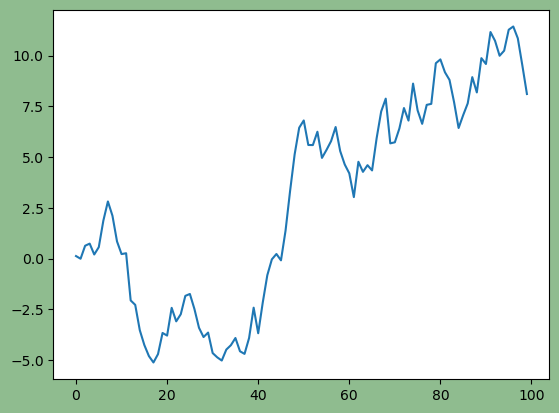

In [8]:
fig = plt.figure(facecolor = "DarkSeaGreen")
plt.plot(y)
plt.show()

Comprobamos en la anterior imagen que una cosa es el fondo de la figura y otra el fondo de la gráfica.

#### edgecolor y linewidth

Los parámetros **edgecolor** y **linewidth** hacen referencia al borde de la figura. Y aquí podemos ver un buen ejemplo de lo que podríamos llamar "falta de consistencia" o de "amigabilidad" de Matplotlib: estos nombres podrían incluir el término "*border*" para hacerlos más intuitivos (y llamarse, por ejemplo, *bordercolor* y *borderwidth*) y, sin embargo, no solo no lo incluyen sino que incluyen términos diferentes (*edge* y *line*) para referirse al mismo concepto. Este tipo de inconsistencias supone que, en la práctica, resulta necesario memorizar gran cantidad de nombres poco intuitivos o estar consultando permanentemente la documentación.

Con el parámetro **edgecolor** damos color al borde de la figura (por defecto es de color blanco) y con el parámetro **linewidth** definimos el ancho de dicho borde (por defecto es 0). Debido a estos valores por defecto, la única forma que tenemos de ver el borde es especificando ambos parámetros:

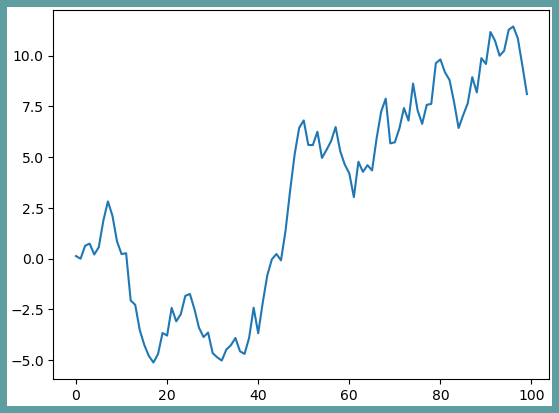

In [9]:
fig = plt.figure(edgecolor = "CadetBlue", linewidth = 10)
plt.plot(y)
plt.show()

### Título

La función [matplotlib.pyplot.suptitle](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) nos permite establecer un título para la figura -no para las gráficas que estén contenidas en ella-:

In [10]:
y1 = generator.standard_normal(100).cumsum()
y2 = generator.standard_normal(100).cumsum()
y3 = generator.standard_normal(100).cumsum()

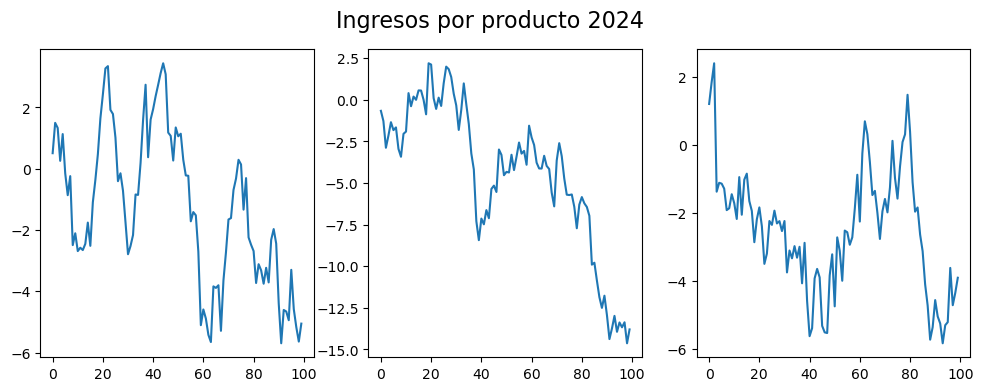

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
plt.suptitle("Ingresos por producto 2024", fontsize = 16)
ax[0].plot(y1)
ax[1].plot(y2)
ax[2].plot(y3)
plt.show()

Esta funcionalidad también está disponible en el método homónimo de una figura:

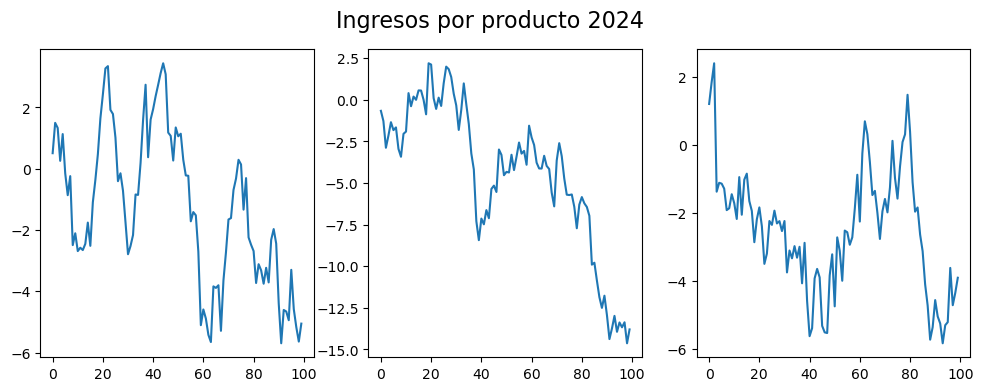

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
fig.suptitle("Ingresos por producto 2024", fontsize = 16)
ax[0].plot(y1)
ax[1].plot(y2)
ax[2].plot(y3)
plt.show()

### Personalización con estilo OO

La mayor parte de estos parámetros están también disponibles como métodos del objeto *figure* (en lo que matplotlib denomina "interfaz orientada a objetos"):

* figsize → set_size_inches
* facecolor → set_facecolor
* edgecolor → set_edgecolor
* linewidth → No tiene equivalente

Por ejemplo:

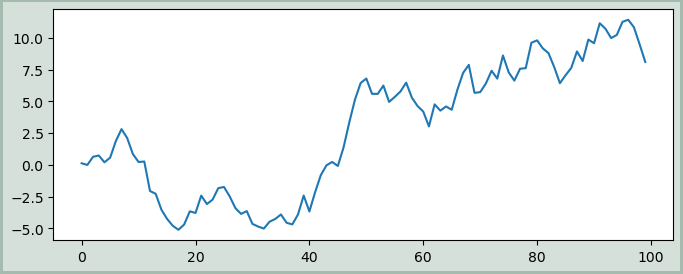

In [13]:
fig = plt.figure(linewidth = 4)
fig.set_size_inches(8, 3)
fig.set_facecolor([0.2, 0.4, 0.3, 0.2])
fig.set_edgecolor([0.2, 0.4, 0.3, 0.3])
plt.plot(y)
plt.show()

(el ancho del borde ha tenido que ser impuesto vía parámetro, al no tener un equivalente en estilo OO).

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Creación de ejes

Hemos visto cómo crear y personalizar la "figura" -ese contenedor dentro del cual vamos a situar el resto de objetos-. Dentro de esa figura crearemos un conjunto de ejes (uno o tantos como necesitemos) y, en el conjunto de ejes, ya podremos crear una gráfica. Y hemos visto también cómo personalizar esa gráfica para el caso concreto de que haya sido creada con la función *plt.plot()*. Nos queda pendiente aprender a personalizar ese objeto intermedio, los ejes, objeto -por otro lado- fundamental, pues de él dependen gran parte de los conceptos que solemos asociar a una gráfica ("gráfica" en sentido genérico): el título, los nombres de los ejes, las marcas de los ejes, las etiquetas a mostrar en dichas marcas, etc.

En esta sección vamos a ver cómo crear un conjunto de ejes y cómo podemos personalizarlo.

Recordemos que, usando la función *plt.plot()*, se crean -si no existen ya- tanto una figura como un conjunto de ejes, aunque la función no nos devuelve una referencia para poder personalizarlos.

Como alternativas tenemos la función **plt.subplots()** que ya conocemos, la función **plt.axes()** y el método de una figura **fig.add_subplot()**. Veámoslas en detalle.

### La función plt.subplots

La función *plt.subplots()* crea una figura y uno (o varios) conjunto de ejes, devolviendo una referencia a la figura y a los ejes. Por defecto -si no se especifica otra cosa- crea un único conjunto de ejes:

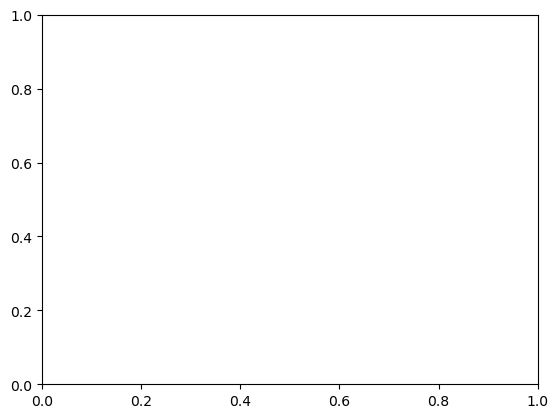

In [14]:
fig, ax = plt.subplots()

En este caso, la variable **ax** es una referencia a un objeto tipo *Axes*:

In [15]:
type(ax)

matplotlib.axes._axes.Axes

Si queremos crear una matriz de conjuntos de ejes de, por ejemplo, 2 filas y 3 columnas (es decir, 6 conjuntos de ejes repartidos de dicha forma), basta añadir estos valores como primeros argumentos de la función:

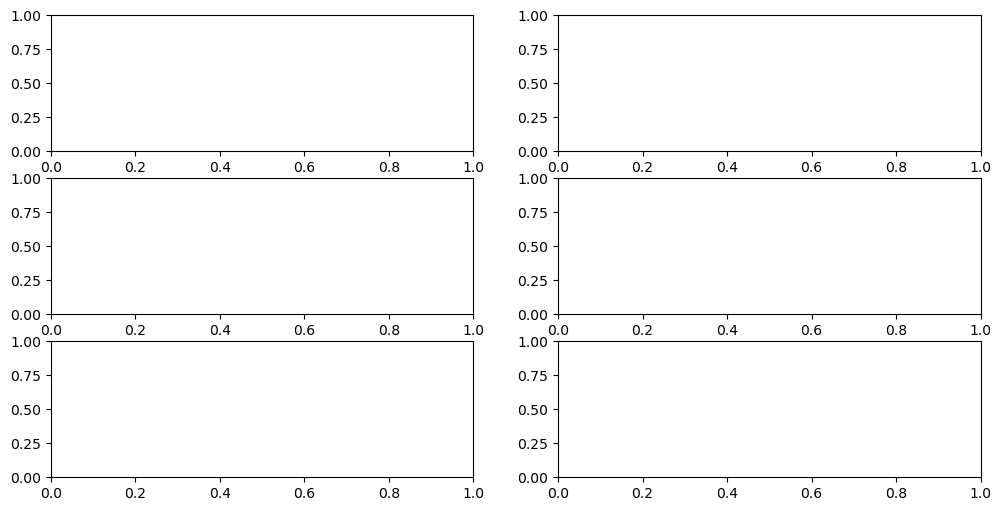

In [16]:
fig, ax = plt.subplots(3, 2, figsize = (12, 6))

Obsérvese que los ejes son creados y mostrados, aun cuando no se creen gráficas dentro de ellos.

Podemos comprobar que, en este caso, $ax$ es un array NumPy, de tamaño 3x2, conteniendo referencias a cada uno de los ejes:

In [17]:
type(ax)

numpy.ndarray

In [18]:
ax.shape

(3, 2)

In [19]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Ahora podríamos ejecutar el método *.plot()* asociado a cada uno de estos ejes para mostrar una gráfica. Por ejemplo, si quisiéramos mostrarla en la segunda fila (cuyo índice es 1) y primera columna (cuyo índice es 0), podríamos hacerlo del siguiente modo:

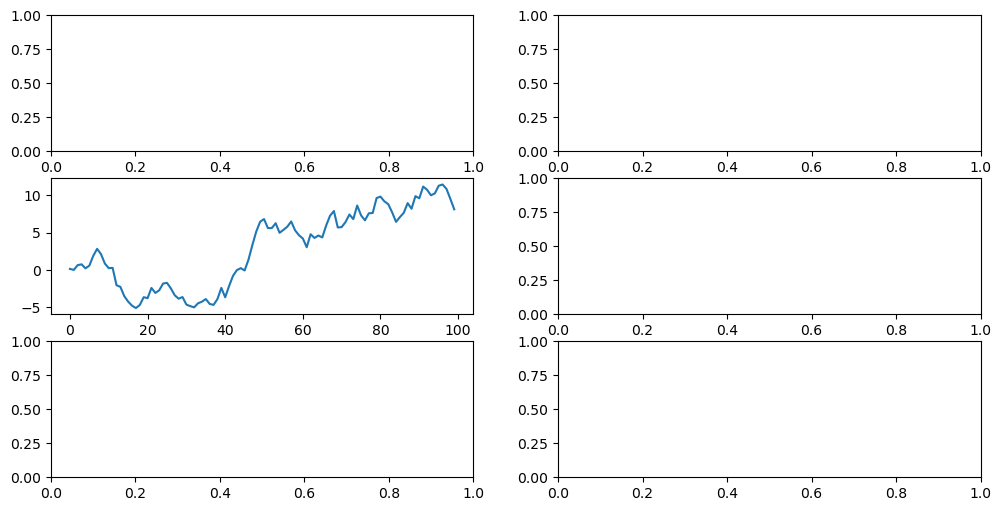

In [20]:
fig, ax = plt.subplots(3, 2, figsize = (12, 6))
ax[1, 0].plot(y)
plt.show()

Las dos siguientes instrucciones son equivalentes:

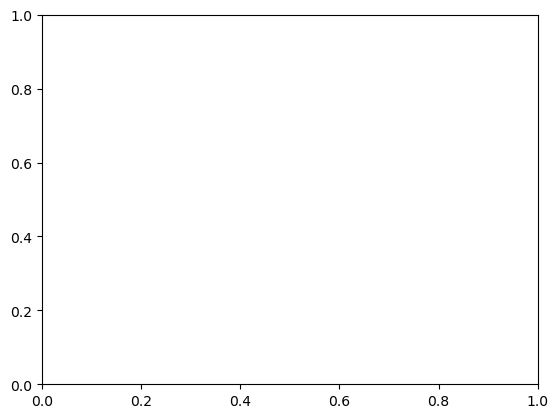

In [21]:
fig, ax = plt.subplots()

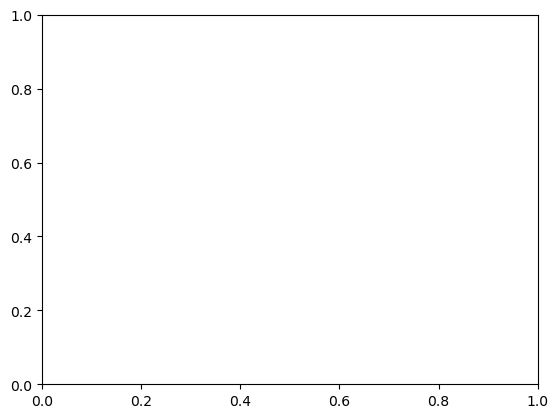

In [22]:
fig, ax = plt.subplots(1, 1)

In [23]:
type(ax)

matplotlib.axes._axes.Axes

Es decir, en el segundo caso no se devuelve una lista formada por un único elemento, sino el elemento directamente.

Dos parámetros interesantes de la función *plt.subplots()* son **sharex** y **sharey**. Éstos controlan la compartición de las propiedades de los ejes. Por defecto toman el valor *False*, lo que supone que cada conjunto de ejes es independiente. Si, por ejemplo, el argumento *sharex* se fija a *True*, todos los ejes $x$ de los diferentes conjuntos de ejes compartirán las mismas propiedades. Veámoslo en la práctica con una matriz de 2x2 conjuntos de ejes:

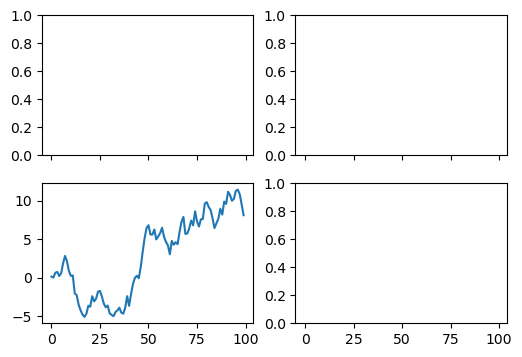

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (6, 4), sharex = True)
ax[1, 0].plot(y)
plt.show()

Comprobamos cómo las marcas (*ticks*) de los ejes horizontales son mostrados solo en la parte inferior de la figura, indicando que los situados por encima de éstos comparten dicho eje.

El equivalente para el eje $y$ es el que podemos ver en la siguiente celda:

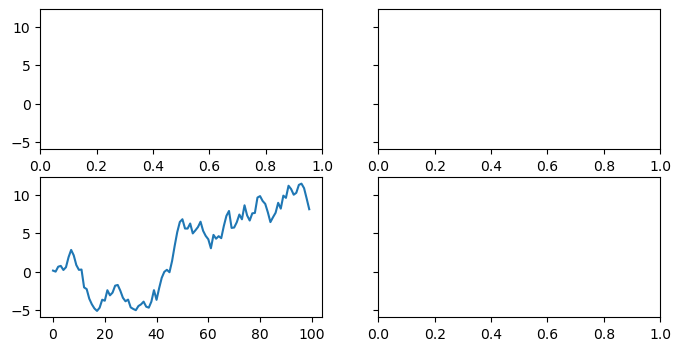

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (8, 4), sharey = True)
ax[1, 0].plot(y)
plt.show()

Ahora, las marcas de los ejes $y$ son mostrados solo en los conjuntos de ejes de la primera columna.

Si fijamos a *True* ambos parámetros:

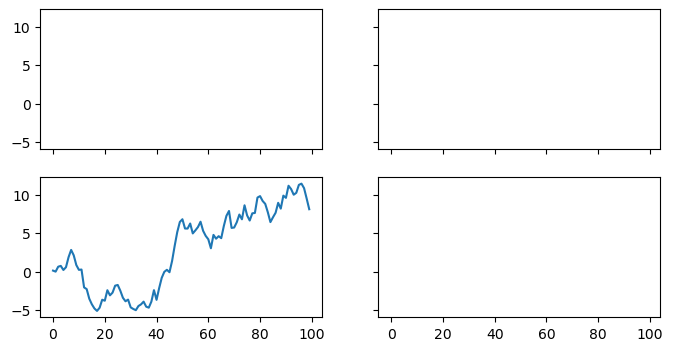

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (8, 4), sharex = True, sharey = True)
ax[1, 0].plot(y)
plt.show()

vemos que las marcas de los ejes son mostrados en la primera columna y en la última fila, indicando que el resto de los conjuntos de ejes comparten dichos ejes.

Pero hay otras opciones. Así, por ejemplo, si el argumento *sharex* toma el valor "*row*", indicamos que cada fila de nuestra matriz compartirá el mismo eje $x$, y si toma el valor "*col*", indicamos que cada columna de nuestra matriz compartirá el mismo eje $x$. Y lo mismo ocurre con el argumento *sharey*, que puede tomar los valores "*row*" o "*col*" indicando que cada fila o cada columna compartirá el eje $y$.

### La función axes

La función [matplotlib.pyplot.axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html) es la segunda alternativa que vamos a ver. Esta función añade un conjunto de ejes a la figura actual, y fija el nuevo conjunto de ejes como actual (o, con otras palabras, lo marca como "activo"). Si no existe una figura, la crea y la marca como actual:

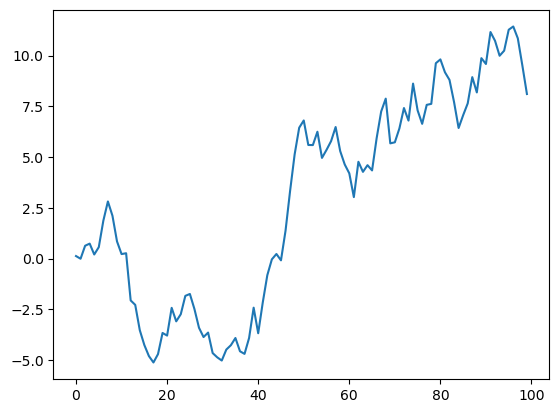

In [27]:
fig = plt.figure()
ax = plt.axes()
ax.plot(y)
plt.show()

Esta función -como se ha comentado- añade un conjunto de ejes a la figura. Si en ésta ya existían otros ejes, se mostrarán en las posiciones y tamaños que fijemos. Para fijar la posición y tamaño de un eje podemos pasar una tupla a la función como primer argumento. Esta tupla contendrá la siguiente información:

(Posición izquierda, posición inferior, ancho, alto)

Por ejemplo, supongamos que tenemos dos conjuntos de valores $y1$ e $y2$ y un conjunto de ejes creados con la función *plt.axes()* en el que creamos una gráfica mostrando la distribución de $y1$ con la función *plt.plot()*:

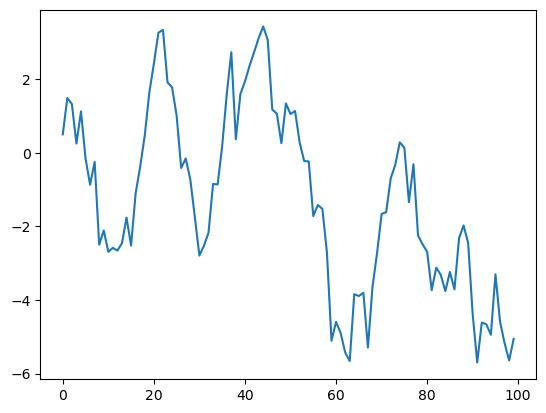

In [28]:
fig = plt.figure()

ax1 = plt.axes()
ax1.plot(y1)

plt.show()

Si, en el código anterior, antes de mostrar la gráfica con *plt.show()*, añadiésemos un segundo conjunto de ejes especificando su posición y tamaño, tendríamos el siguiente resultado:

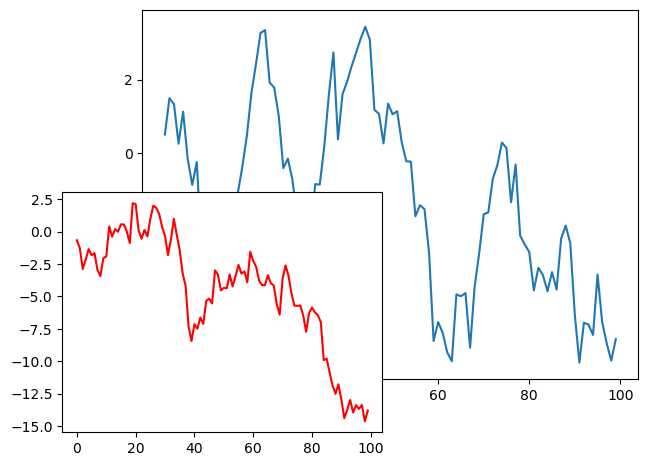

In [29]:
fig = plt.figure()

ax1 = plt.axes()
ax1.plot(y1)

ax2 = plt.axes([0.0, 0.0, 0.5, 0.5])
ax2.plot(y2, color = "red")

plt.show()

La segunda gráfica la hemos creado a partir del punto (0, 0) con ancho y alto de 0.5. Estos valores indican el ancho y el alto con relación al ancho y el alto de la figura.

Si quisiéramos mostrar un conjunto de ejes encima del otro o distribuidos en filas y columnas, deberíamos crearlos con las posiciones y tamaños adecuados, para lo que resulta mucho más práctico usar la función *plt.subplots()* ya vista. Sin embargo, para solapar las gráficas o mostrarlas en posiciones o con tamaños arbitrarios, la función *plt.axes()* se muestra extremandamente práctica.

La función *plt.axes()* también admite los parámetros **sharex** y **sharey** que controlan la compartición de los ejes. Y también admite el parámetro **label** que asigna una etiqueta al conjunto de ejes generados.

### El método add_subplot

El método *.add_subplot()* asociado a una figura añade un conjunto de ejes a la misma pero suponiéndolo en una matriz de columnas y filas (de conjuntos de ejes) y creándolo en la posición indicada de dicha matriz.

Si se invoca el método sin añadir argumentos, se supone que dicha matriz está formada únicamente por un conjunto de ejes (es decir, una columna y una fila):

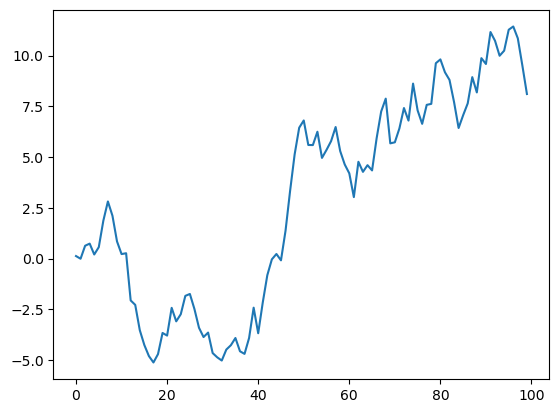

In [30]:
fig = plt.figure()
fig.add_subplot()
plt.plot(y)
plt.show()

Pero si se invoca añadiendo como argumentos el número de filas de la matriz, el número de columnas de la matriz y la posición que ocupa el conjunto de ejes a crear, se supone una matriz de dichas dimensiones y se sitúa el conjunto de ejes en la posición correcta:

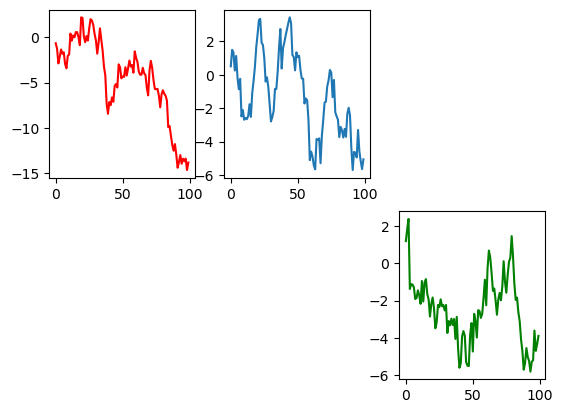

In [31]:
fig = plt.figure()
fig.add_subplot(2, 3, 2)
plt.plot(y1)
fig.add_subplot(2, 3, 1)
plt.plot(y2, color = "red")
fig.add_subplot(2, 3, 6)
plt.plot(y3, color = "green")
plt.show()

En el ejemplo anterior partimos de 3 conjuntos de datos ($y1$, $y2$ e $y3$) a mostrar en sendas gráficas y, para cada uno de ellos creamos un conjunto de ejes con el método *.add_subplot()*. En los tres casos se indica una matriz de 2 filas y 3 columnas. El primer conjunto de ejes creado -con la gráfica de color azul- se sitúa en la posición 2 (las posiciones se cuentan a partir de 1, de izquierda a derecha y de arriba abajo). El segundo conjunto de ejes -con la gráfica de color rojo- se sitúa en la posición 1, es decir, en la esquina superior izquierda de la matriz. Y el tercer conjunto de ejes -con la gráfica de color verde- se sitúa en la posición 6, es decir, en la esquina inferior derecha. El resto de espacios en la matriz quedan sin ocupar.

Este método también acepta los parámetros **sharex** y **sharey** que controlan la compartición de los ejes, y el parámetro **label** que asigna una etiqueta al conjunto de ejes creado.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Personalización de ejes

En la documentación de Matplotlib encontramos un [esquema con la "anatomía" de una figura](https://matplotlib.org/stable/users/explain/quick_start.html):

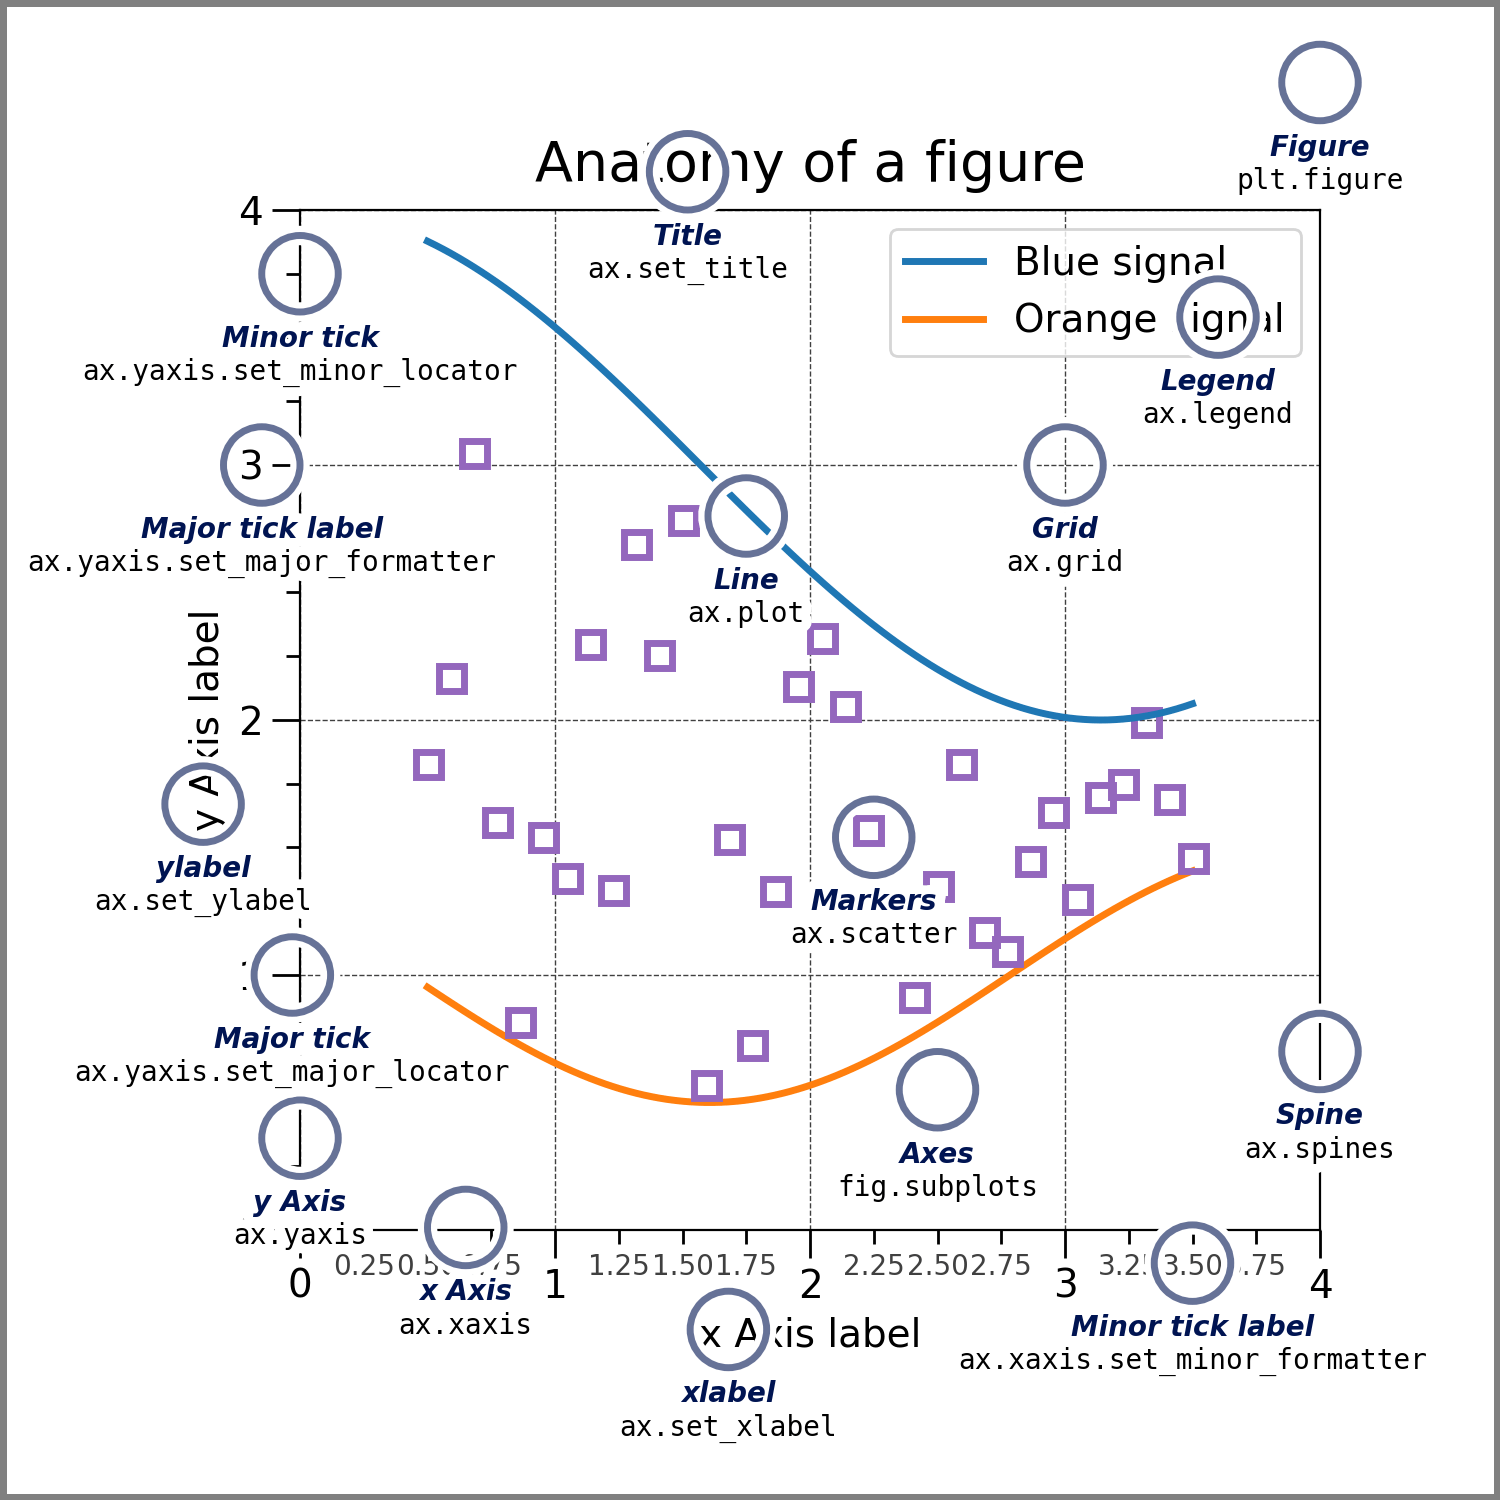

Identificamos en ella un elemento que depende de lo que llamamos "gráfica": la línea (line) -y su color, ancho, estilo...-.

Otro de los elementos mostrados -la leyenda- depende de la figura. Y el resto de elementos dependen directamente del conjunto de ejes:

* **Title**: Título a mostrar en la gráfica
* **x axis label**: Nombre del eje x
* **y axis label**: Nombre del eje y
* **Major ticks**: Marcas principales en los ejes
* **Minor ticks**: Marcas secundarios en los ejes
* **Major tick labels**: Etiquetas a mostrar en las marcas principales de los ejes
* **Minor tick labels**: Etiquetas a mostrar en las marcas secundarios de los ejes
* **Spines**: Bordes de la gráfica
* **Grid**: Rejilla a mostrar sobre la gráfica

Veamos en las siguientes secciones cómo personalizarlos.

### Título

Podemos añadir un título a nuestro eje con la función [matplotlib.pyplot.title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html). Esta función acepta como primer argumento el texto del título y otros parámetros que representan propiedades del texto, por ejemplo:

* **alpha**: Transparencia del texto
* **backgroundcolor**: Color de fondo
* **color**: Color del texto
* **fontfamily**: Familia de la fuente a usar
* **fontname**: Nombre de la fuente a usar
* **fontsize**: Tamaño de la fuente
* **fontstretch**: Ancho de la fuente
* **fontstyle**: Estilo de la fuente ('normal', 'italic', 'oblique')
* **fontvariant**: Variante de la fuente ('normal', 'small-caps')
* **fontweight**: "Peso" de la fuente ( 'ultralight', 'light', 'normal', 'regular', 'bold', etc.)
* **horizontalalignment**: Alineación horizontal del texto ('center', 'right', 'left')
* **linespacing**: Espacio entre líneas
* **position**: Posición $x$ e $y$ del título
* **rotation**: Ángulo de rotación del texto (en grados)
* **verticalalignment**: Alineación vertical del texto ('center', 'top', 'bottom', 'baseline', 'center_baseline')
* **x**: Posición $x$ del texto
* **y**: Posición $y$ del texto

Los parámetros **position**, **x** e **y** toman normalmente valores entre 0 y 1, correspondiendo el 0 al extremo izquierdo del espacio ocupado por el conjunto de ejes y el 1 al extremo derecho (o a los extremos inferior y superior, si nos referimos a la vertical). Pueden tomar también valores negativos o superiores a 1, pero en este caso el texto se mostrará fuera de los límites de los ejes.

Todos estos parámetros son extremadamente útiles pues podremos aplicarlos no solo al título, sino a las etiquetas que demos a los ejes, a las etiquetas de las marcas de los ejes, etc.

En la siguiente página tenemos el listado completo de atributos y los valores que pueden tomar:

https://matplotlib.org/stable/api/text_api.html

Veamos algunos ejemplos. En el siguiente simplemente ejecutamos la función *plt.title()* pasando como argumento el texto a mostrar:

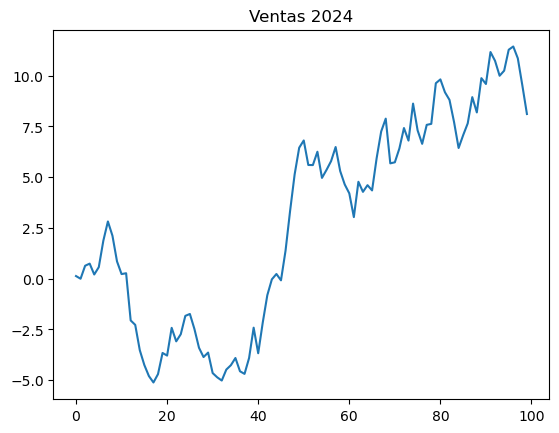

In [32]:
fig, ax = plt.subplots()
plt.plot(y)
plt.title("Ventas 2024")
plt.show()

En el siguiente ejemplo especificamos una fuente tamaño 20 y alineamos el texto a la derecha (es decir, el extremo derecho del texto se muestra en el centro del área disponible):

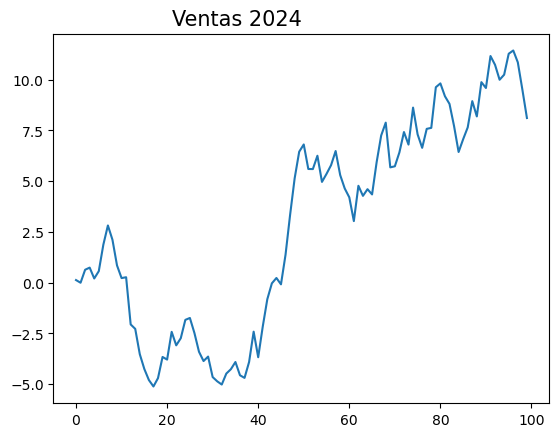

In [33]:
fig, ax = plt.subplots()
plt.plot(y)
plt.title("Ventas 2024", fontsize = 15, horizontalalignment = "right")
plt.show()

Por último, en el siguiente ejemplo configuramos la posición del texto (es decir, su posición $x$ e $y$ en la figura), su tamaño, color y peso:

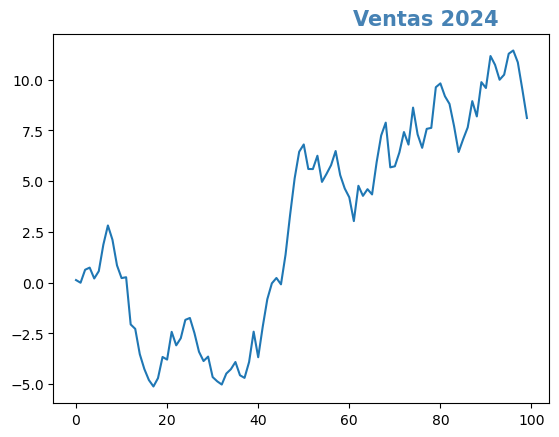

In [34]:
fig, ax = plt.subplots()
plt.plot(y)
plt.title("Ventas 2024",
          position = (0.75, 0.85),
          fontsize = 15,
          color = "SteelBlue",
          fontweight = "bold")
plt.show()

Todos los parámetros relativos al texto tienen un método equivalente en la interfaz "orientada a objetos". Estos métodos se aplican a la variable que represente el conjunto de ejes. Por ejemplo, el equivalente al código de la anterior imagen es:

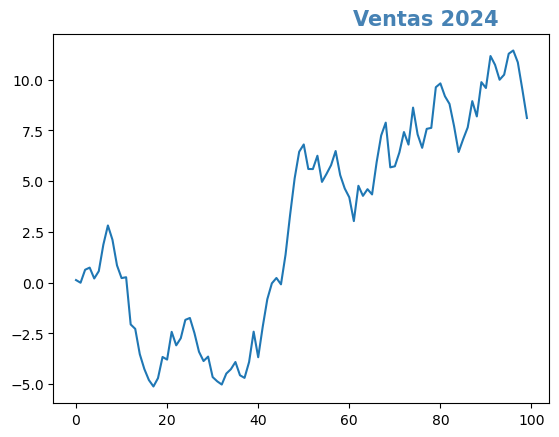

In [35]:
fig, ax = plt.subplots()
ax.plot(y)
title = ax.set_title("Ventas 2024")
title.set_position(xy = [0.75, 0.85])
title.set_fontsize(15)
title.set_color("SteelBlue")
title.set_fontweight("bold")
plt.show()

### Etiquetas de ejes

Es posible asignar etiquetas a los ejes $x$ e $y$ con las funciones [matplotlib.pyplot.xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) y [matplotlib.pyplot.ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html). Ambas funciones aceptan un primer argumento con el texto y aceptan también todos los atributos del texto que hemos visto para el título:

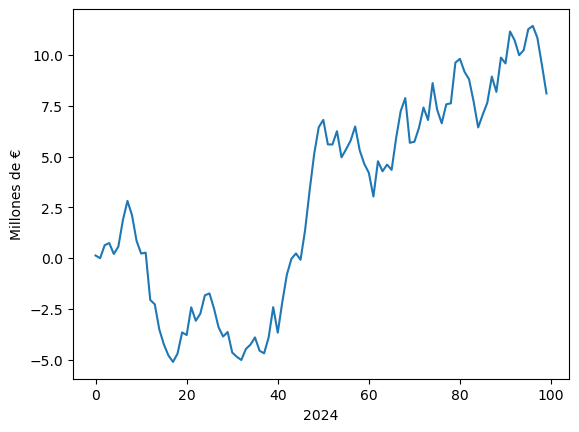

In [36]:
fig, ax = plt.subplots()
plt.plot(y)
plt.xlabel("2024")
plt.ylabel("Millones de €")
plt.show()

En el ejemplo de la imagen anterior simplemente ejecutamos las funciones mencionadas sin especificar atributos del texto adicionales. En el siguiente ejemplo se aplica cierto formato a ambas etiquetas:

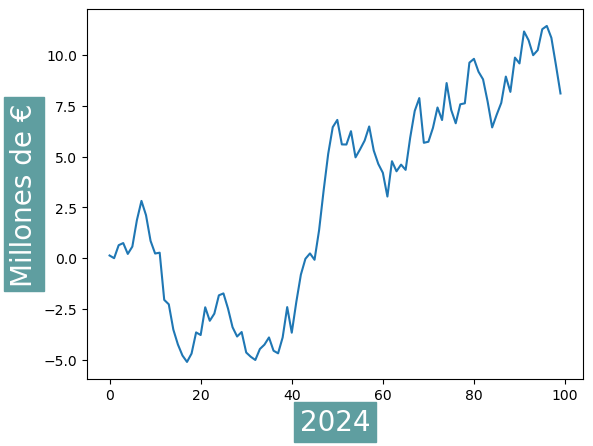

In [37]:
fig, ax = plt.subplots()
plt.plot(y)
plt.xlabel("2024",
           fontsize = 20,
           color = "w",
           fontstretch = 0,
           backgroundcolor = "CadetBlue")
plt.ylabel("Millones de €",
           fontsize = 20,
           color = "w",
           fontstretch = 0,
           backgroundcolor = "CadetBlue")
plt.show()

Los métodos del conjunto de ejes equivalentes en la interfaz OO son **.set_xlabel()** y **.set_ylabel()**, ambos devolviendo una referencia al objeto texto creado:

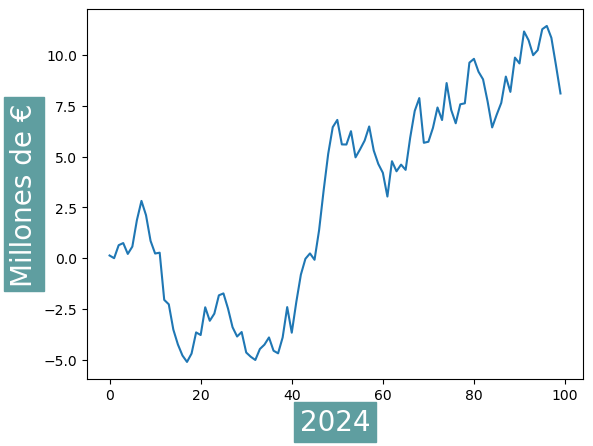

In [38]:
fig, ax = plt.subplots()
ax.plot(y)
xlabel = ax.set_xlabel("2024",
           fontsize = 20,
           color = "w",
           fontstretch = 0,
           backgroundcolor = "CadetBlue")
ylabel = ax.set_ylabel("Millones de €",
           fontsize = 20,
           color = "w",
           fontstretch = 0,
           backgroundcolor = "CadetBlue")

plt.show()

### Marcas de ejes

Supongamos que partimos de los siguientes datos:

In [39]:
x = range(100, 200)
y = generator.standard_normal(100).cumsum()

Como podemos comprobar, se trata de un conjunto de datos cuyos valores **&#120;** varían entre 100 y 200 (este último valor sin incluir, esto es, se trata de 100 números enteros consecutivos comenzando por el 100) y cuyos valores **&#121;** resultan de la suma acumulada de números reales extraídos de una distribución gaussiana.

Mostremos estos valores en una gráfica usando el método *.plot()*:

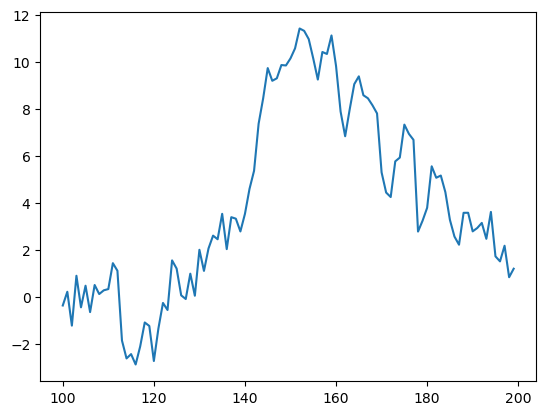

In [40]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Vemos que Matplotlib hace un más que razonable esfuerzo en mostrar tanto en el eje $x$ como en el eje $y$ marcas suficientemente significativas: en eje $x$ las sitúa de 20 en 20 entre el número 100 y el 200 (es decir, cubriendo todo el rango de nuestros valores $x$) y en el eje $y$ las sitúa de 2 en 2 entre valores que considera adecuados.

Pero ¿y si queremos mostrar las marcas entre dos valores distintos? ¿o con una frecuencia diferente? Para esto tenemos las funciones [matplotlib.pyplot.xticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) y [matplotlib.pyplots.yticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html). Estas funciones permiten obtener o establecer las marcas en los ejes. Por ejemplo, supongamos que queremos mostrar las marcas del eje $x$ solo entre los valores 120 y 180, pero de 10 en 10. Bastaría con ejecutar la siguiente función:

plt.xticks(ticks = range(120, 180, 10))

(en realidad, no sería imprescindible indicar el nombre del parámetro "ticks")

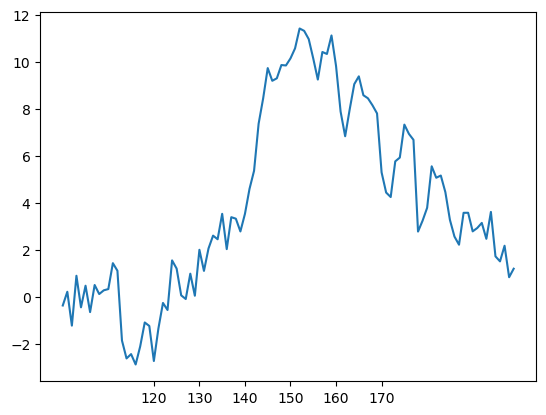

In [41]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.xticks(ticks = range(120, 180, 10))
plt.show()

Si, por otro lado, quisiéramos que las marcas se mostrasen incluyendo valores de $x$ no incluidos en nuestro rango de datos, por ejemplo entre 0 y 250 de 20 en 20, usaríamos la misma función con los valores correspondientes:

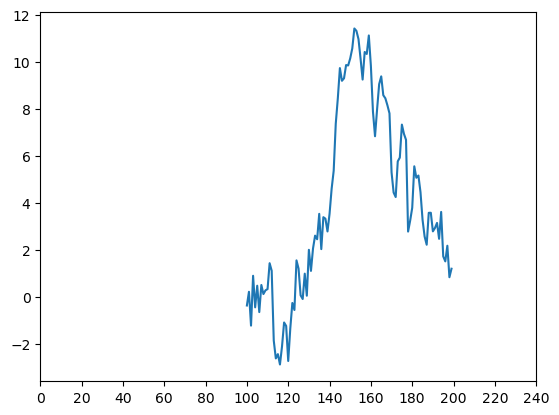

In [42]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.xticks(ticks = range(0, 250, 20))
plt.show()

Vemos que, ahora, la gráfica ocupa un espacio menor para dejar sitio a los valores para los que hemos establecido las marcas.

Para el eje $y$ el proceso es exactamente el mismo. Mostremos marcas, por ejemplo solo entre los valores 120 y 180 de 10 en 10 en el eje $x$, y entre -2 y 4 de 1 en 1 en el eje $y$:

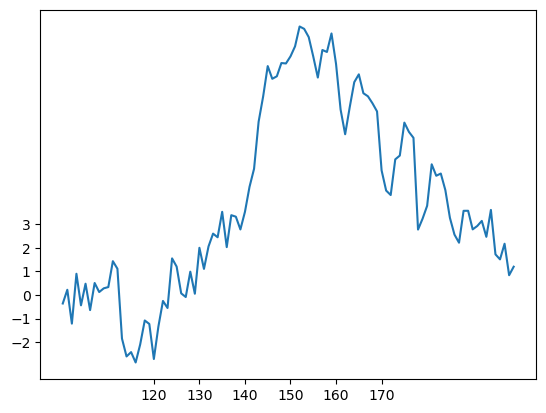

In [43]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.xticks(ticks = range(120, 180, 10))
plt.yticks(ticks = range(-2, 4))
plt.show()

En realidad, las funciones *plt.xticks()* y *plt.yticks()* no solo pueden fijar las marcas en los ejes, también pueden fijar las etiquetas de dichas marcas. Por ejemplo, en este último ejemplo que hemos visto, las etiquetas mostradas en el eje $x$ son 120, 130, 140, 150, 160 y 170, pero podríamos querer fijarlas en algo como 2010, 2011, 2012, 2013, 2014 y 2015:

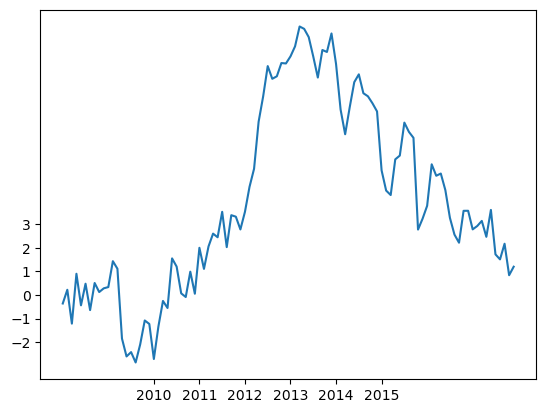

In [44]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.xticks(
    ticks = range(120, 180, 10),
    labels = [2010, 2011, 2012, 2013, 2014, 2015]
)
plt.yticks(ticks = range(-2, 4))
plt.show()

En el ejemplo anterior, hemos pasado a la función *plt.xticks()* un primer argumento que fija los valores en los que se van a mostrar marcas, y un segundo argumento que fija las etiquetas a mostrar en dichas posiciones.

Los métodos en el estilo OO equivalentes son:

plt.xticks → ax.set_xticks()

plt.yticks → ax.set_yticks()

siendo $ax$ la variable que representa el conjunto de ejes. De esta forma, el equivalente al código mostrado anteriormente es:

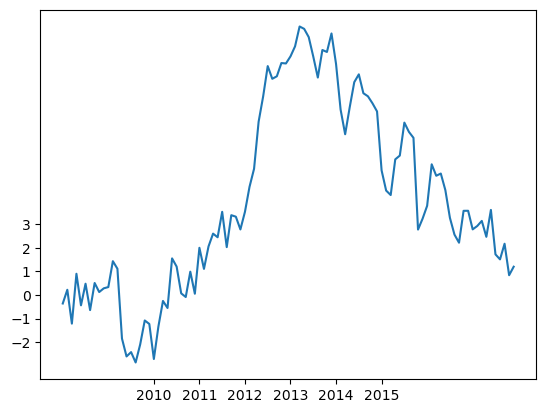

In [45]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xticks(
    ticks = range(120, 180, 10),
    labels = [2010, 2011, 2012, 2013, 2014, 2015]
)
ax.set_yticks(ticks = range(-2, 4))
plt.show()

Existen también métodos para establecer solo las etiquetas: [set_xticklabels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) y [set_yticklabels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html). Así, el código anterior podría quedar de la siguiente forma:

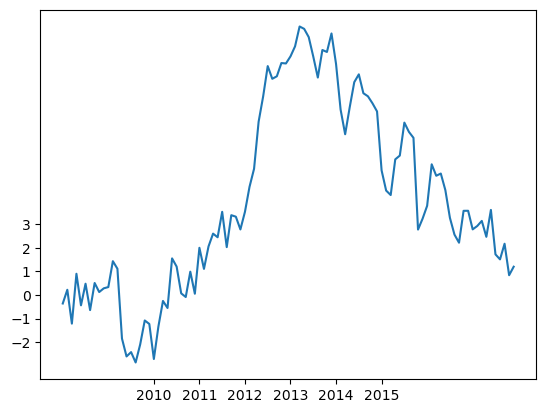

In [46]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xticks(ticks = range(120, 180, 10))
ax.set_xticklabels(labels = [2010, 2011, 2012, 2013, 2014, 2015])
ax.set_yticks(ticks = range(-2, 4))
plt.show()

### Marcas principales y secundarias

Existe, en el estilo OO, otra forma de establecer las posiciones de las marcas principales (las vistas hasta ahora) y de las marcas secundarias (marcas que se muestran con un tamaño menor y sin etiqueta). Esta otra forma se basa en los métodos [set_major_locator](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html) y [set_minor_locator](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_minor_locator.html). Ambos métodos tienen como único argumento una valor de tipo "*Locator*". Para crear una variable de este tipo tenemos que importar la función [MultipleLocator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MultipleLocator) de la sublibrería [matplotlib.ticker](https://matplotlib.org/stable/api/ticker_api.html):

In [47]:
from matplotlib.ticker import MultipleLocator

In [48]:
xminor = MultipleLocator(1)
xmajor = MultipleLocator(7)

En el ejemplo anterior estamos creando dos "*Locators*" y asignándolos a dos variables, *xminor* y *xmajor*. Los valores entre paréntesis indican cada cuantos puntos se desea mostrar las marcas.

Con este tipo de *locators* ya podríamos ejecutar los métodos comentados (*.set_major_locator()* y *.set_minor_locator()*). Por ejemplo, si queremos que una gráfica muestre en el eje $x$ las marcas principales cada 10 puntos y las marcas secundarias cada punto, podríamos hacerlo con el siguiente código:

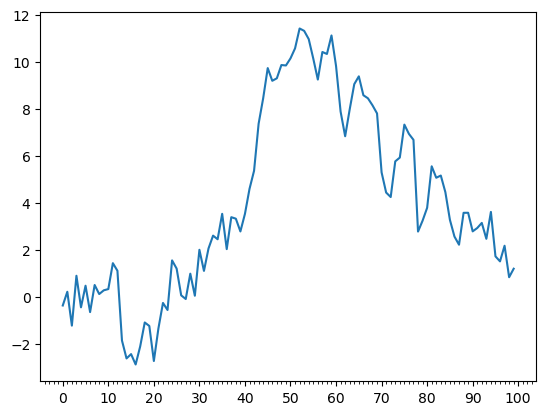

In [49]:
fig, ax = plt.subplots()
ax.plot(y)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

Podemos observar que los métodos en cuestión se deben aplicar al objeto *ax.xaxis* que representa al eje $x$ en el conjunto de ejes (o al objeto *ax.yaxis* si deseásemos configurar el eje $y$). Estos son los objetos "eje" (en singular) o "*axis*".

También observamos que las marcas principales son las únicas que tienen etiquetas asignadas: las secundarias solo se muestran usando una pequeña marca en el eje.

Suponiendo que hemos importado la función *MultipleLocator*, realicemos otro ejemplo configurando esta vez los dos ejes de forma que en el eje $x$ las marcas principales se muestren cada 15 puntos y las secundarias cada 3, y que en el eje $y$ las marcas principales se muestren cada 3 puntos, y las secundarias cada punto:

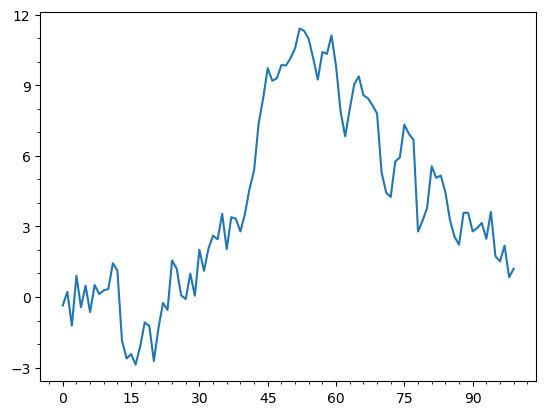

In [50]:
fig, ax = plt.subplots()
ax.plot(y)

# Eje x
ax.xaxis.set_major_locator(MultipleLocator(15))
ax.xaxis.set_minor_locator(MultipleLocator(3))

# Eje y
ax.yaxis.set_major_locator(MultipleLocator(3))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.show()

### Límites de los ejes

Ya sabemos que Matplotlib hace un buen trabajo adaptando los ejes de forma que cubran todos los datos, tanto a lo largo del eje $x$ como a lo largo del eje $y$. Por ejemplo:

In [51]:
min(y), max(y)

(-2.866921602986074, 11.413838862364022)

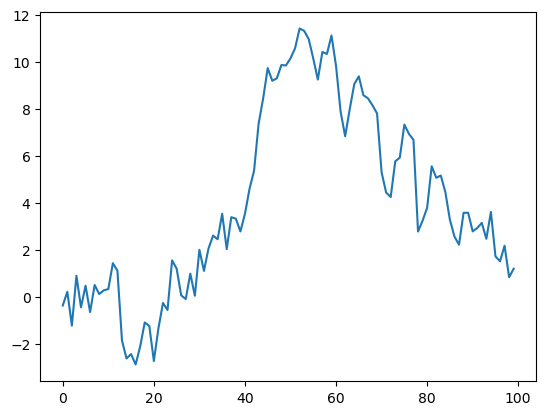

In [52]:
fig, ax = plt.subplots()
ax.plot(y)
plt.show()

En la imagen anterior vemos que Matplotlib ha dimensionado el eje **&#121;** de forma que se cubra el rango de valores que toman nuestros datos. De forma semejante, al no haber especificado un conjunto de valores para el eje $x$ se ha generado uno automáticamente que incluye el rango de números enteros entre 0 y 99, ambos incluidos (uno para cada uno de los valores de $y$).

Pero supongamos que no nos interesa mostrar más que una parte de la gráfica, por ejemplo, la situada entre los valores 20 y 60 del eje $x$. Para esto tenemos la función [matplotlib.pyplot.xlim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html):

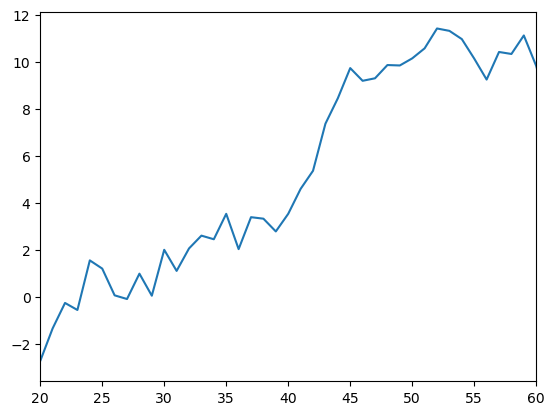

In [53]:
fig, ax = plt.subplots()
ax.plot(y)
plt.xlim(20, 60)
plt.show()

Para el eje y tenemos la función equivalente: [matplotlib.pyplot.ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html):

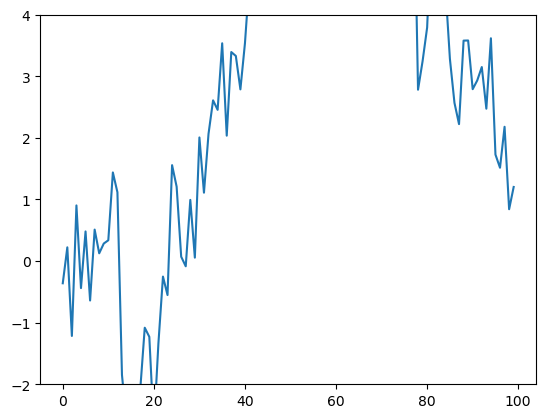

In [54]:
fig, ax = plt.subplots()
ax.plot(y)
plt.ylim(-2, 4)
plt.show()

En el estilo OO, los métodos equivalentes a las funciones vistas son [set_xlim](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) y [set_ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html), a ejecutar sobre la variable que referencia al conjunto de ejes. En el siguiente ejemplo usamos ambos métodos para establecer simultáneamente los límites de los ejes $x$ e $y$:

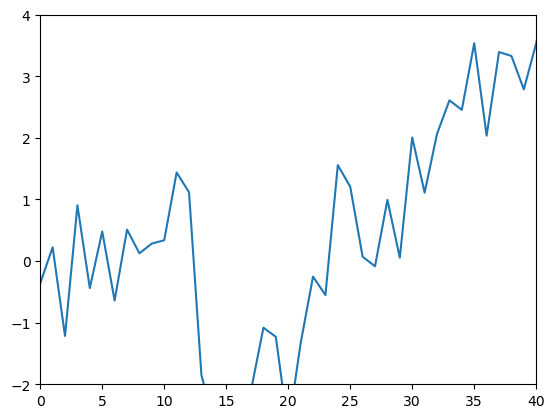

In [55]:
fig, ax = plt.subplots()
ax.plot(y)
ax.set_xlim(0, 40)
ax.set_ylim(-2, 4)
plt.show()

Por otro lado, los métodos para leer los límites de ambos ejes son [get_xlim](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_xlim.html) y [get_ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_ylim.html), a ejecutar sobre la variable que referencia al conjunto de ejes también.

### Relación de aspecto

Otro de los elementos que podemos personalizar de los ejes es su relación de aspecto (la relación entre una unidad en el eje $x$ y una unidad en el eje $y$):

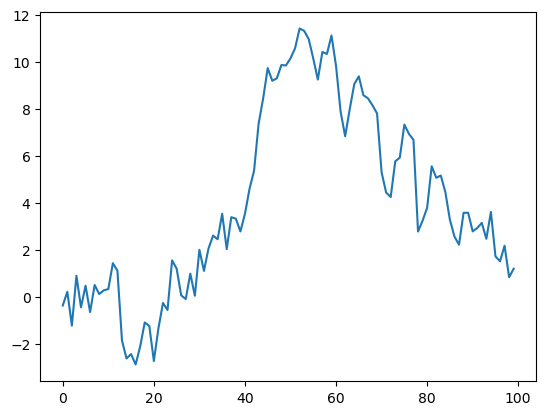

In [56]:
fig, ax = plt.subplots()
ax.plot(y)
plt.show()

Aun cuando el ancho de la gráfica es mayor que la altura, la relación de aspecto está bien alejada de la relación 1:1, por ejemplo.

Para controlar esta relación de aspecto podemos recurrir al método [set_aspect](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html). Este método -asociado al conjunto de ejes- recibe un primer argumento que puede ser "*auto*" (opción por defecto), "*equal*" (opción con la que la relación de aspecto será de 1:1) o un número que determinará exactamente la relación de aspecto a aplicar.

Veamos la segunda de las opciones: "*equal*".

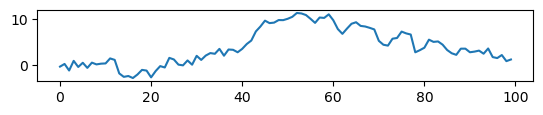

In [57]:
fig, ax = plt.subplots()
ax.plot(y)
ax.set_aspect("equal")
plt.show()

Comprobamos que, para que un punto en el eje $x$ tenga el mismo tamaño que un punto en el eje $y$, este último deberá mostrarse mucho menor.

Si fijamos una relación de aspecto de, por ejemplo, 2, el resultado es el siguiente:

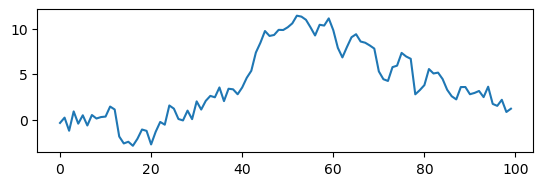

In [58]:
fig, ax = plt.subplots()
ax.plot(y)
ax.set_aspect(2)
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>